$$x \sim N(0, 1)$$
$$y = x^2 + \epsilon$$
$$\epsilon ~ N(0, 1)$$

In [5]:
# Create toy data
import numpy as np

np.random.seed(42)
x = np.random.normal(loc=0, scale=1, size=100)
epsilon = np.random.normal(loc=0, scale=1, size=100)
y = x**2 + epsilon

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'A title')

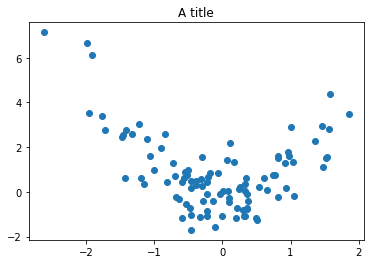

In [8]:
# Quick and dirty
plt.scatter(x, y)
plt.title("A title")

Text(0, 0.5, '$y = x^2 + \\epsilon$')

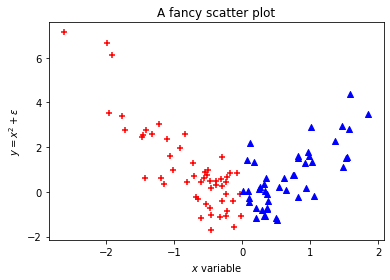

In [22]:
# Better way
fig, ax = plt.subplots()
ax.scatter(x[x < 0], y[x < 0], color="red", marker="+")
ax.scatter(x[x >= 0], y[x >= 0], color="blue", marker="^")

ax.set_title("A fancy scatter plot")
ax.set_xlabel("$x$ variable")
ax.set_ylabel("$y = x^2 + \\epsilon$")

In [32]:
import pandas as pd
import statsmodels.formula.api as smf

toy_df = pd.DataFrame({"x": x, "y": y})
model = smf.ols("y ~ x + I(x**2)", data=toy_df)
model_fit = model.fit()
y_hat = model_fit.predict()
len(y_hat)

100

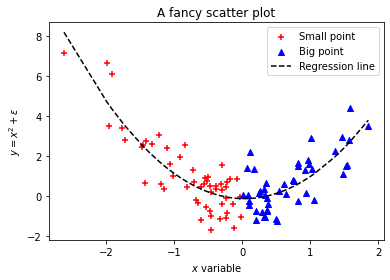

In [49]:
# Better way

idx = np.argsort(x)

fig, ax = plt.subplots()
ax.scatter(x[x < 0], y[x < 0], color="red", marker="+", label="Small point")
ax.scatter(x[x >= 0], y[x >= 0], color="blue", marker="^", label="Big point")
ax.plot(x[idx], y_hat[idx], "k--", label="Regression line")

ax.set_title("A fancy scatter plot")
ax.set_xlabel("$x$ variable")
ax.set_ylabel("$y = x^2 + \\epsilon$")

ax.legend()

In [53]:
x_predict = np.linspace(-3, 3, 100)
df_predict = pd.DataFrame({"x": x_predict})
y_predict = model_fit.predict(df_predict)
y_predict

0     10.748958
1     10.318017
2      9.895776
3      9.482236
4      9.077397
        ...    
95     8.659662
96     9.055319
97     9.459678
98     9.872738
99    10.294498
Length: 100, dtype: float64

In [58]:
df_predict["y"] = model_fit.predict(df_predict)
df_predict

,x,y
0,-3.000000,10.748958
1,-2.939394,10.318017
2,-2.878788,9.895776
3,-2.818182,9.482236
4,-2.757576,9.077397
...,...,...
95,2.757576,8.659662
96,2.818182,9.055319
97,2.878788,9.459678
98,2.939394,9.872738


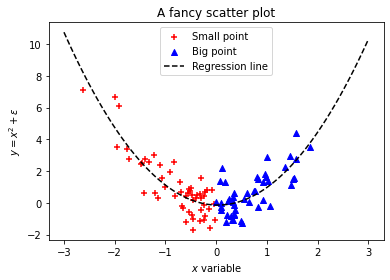

In [60]:
# Better way
fig, ax = plt.subplots()
ax.scatter(x[x < 0], y[x < 0], color="red", marker="+", label="Small point")
ax.scatter(x[x >= 0], y[x >= 0], color="blue", marker="^", label="Big point")
ax.plot(x_predict, y_predict, "k--", label="Regression line")

ax.set_title("A fancy scatter plot")
ax.set_xlabel("$x$ variable")
ax.set_ylabel("$y = x^2 + \\epsilon$")

ax.legend()

In [65]:
fig.set_size_inches(8, 6)
fig.savefig("scatter_plot.png", facecolor="white", dpi=300)

In [64]:
import os
os.getcwd()

'/home/martin/pp4rs/2022-uzh-course-material/07-python-plotting/live-notes'

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


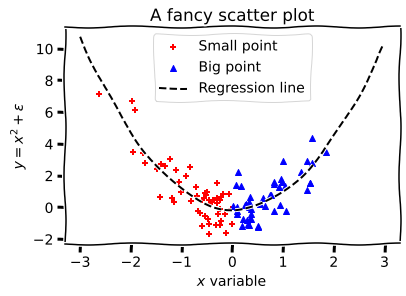

In [67]:
# Better way
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.scatter(x[x < 0], y[x < 0], color="red", marker="+", label="Small point")
    ax.scatter(x[x >= 0], y[x >= 0], color="blue", marker="^", label="Big point")
    ax.plot(x_predict, y_predict, "k--", label="Regression line")

    ax.set_title("A fancy scatter plot")
    ax.set_xlabel("$x$ variable")
    ax.set_ylabel("$y = x^2 + \\epsilon$")

    ax.legend()

## Actual data

In [69]:
iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [71]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

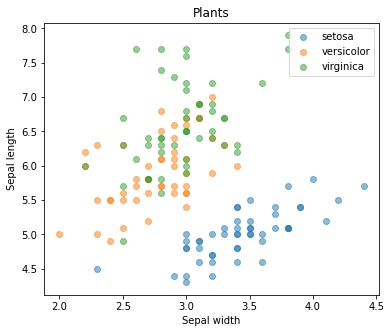

In [97]:
fig, ax = plt.subplots()

for species, sub_df in iris.groupby("species"):
    ax.scatter(sub_df["sepal_width"], sub_df["sepal_length"], label=species, alpha=0.5)

ax.set_xlabel("Sepal width")
ax.set_ylabel("Sepal length")
ax.set_title("Plants")

ax.legend()

fig.set_size_inches(6, 5)

In [86]:
for species, sub_df in iris.groupby("species"):
    my_species = species
    my_sub_df = sub_df
    break

In [89]:
iris.groupby("species")["petal_length"].mean()

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

Text(0.5, 0.98, 'This is a title for the whole mess')

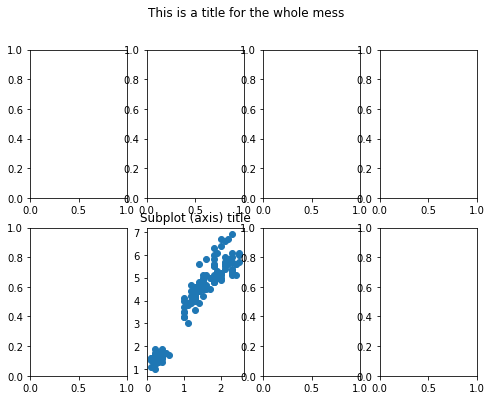

In [106]:
fig, ax = plt.subplots(2, 4)
fig.set_size_inches(8, 6)
ax[1, 1].scatter(iris["petal_width"], iris["petal_length"])
ax[1, 1].set_title("Subplot (axis) title")
fig.suptitle("This is a title for the whole mess")

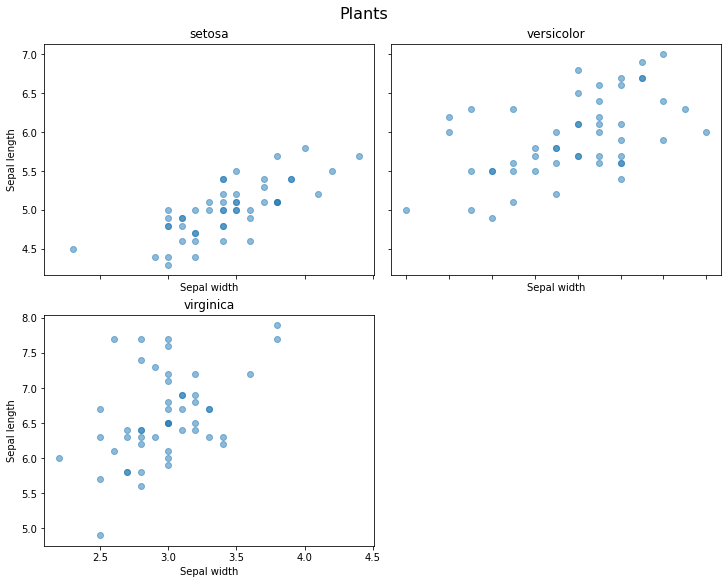

In [185]:
fig, ax = plt.subplots(2, 2, sharex="col", sharey="row")

for i, (species, sub_df) in enumerate(iris.groupby("species")):
    row = i // 2
    col = i % 2
    ax[row, col].scatter(sub_df["sepal_width"], sub_df["sepal_length"], alpha=0.5)
    ax[row, col].set_title(species)
    ax[row, col].set_xlabel("Sepal width")

ax[0, 0].set_ylabel("Sepal length")
ax[1, 0].set_ylabel("Sepal length")
fig.suptitle("Plants", fontsize=16)
fig.set_constrained_layout(True)
fig.delaxes(ax[1, 1])

fig.set_size_inches(10, 8)

In [122]:
for i, (species, sub_df) in enumerate(iris.groupby("species")):
    row = i // 2
    col = i % 2
    print(i, row, col)

0 0 0
1 0 1
2 1 0


# Exercise

In [128]:
import os
os.getcwd()

'/home/martin/pp4rs/2022-uzh-course-material/07-python-plotting/live-notes'

In [133]:
girlfriends = pd.read_excel("data/leonardo.xlsx", sheet_name="girlfriends_by_year")
birth_dates = pd.read_excel("data/leonardo.xlsx", sheet_name="birth_dates")

In [135]:
print(girlfriends.columns)
print(birth_dates.columns)

Index(['year', 'girlfriend'], dtype='object')
Index(['name', 'age'], dtype='object')


In [141]:
data = girlfriends.merge(birth_dates, left_on="girlfriend", right_on="name")
data = data.drop(columns=["name"]) \
    .rename(columns={"age": "birth_year"})
data["age"] = data["year"] - data["birth_year"]
data.head()

,year,girlfriend,birth_year,age
0,1999,Gisele Bundchen,1980,19
1,2000,Gisele Bundchen,1980,20
2,2001,Gisele Bundchen,1980,21
3,2002,Gisele Bundchen,1980,22
4,2003,Gisele Bundchen,1980,23


In [154]:
data["leos_age"] = data["year"] - 1974

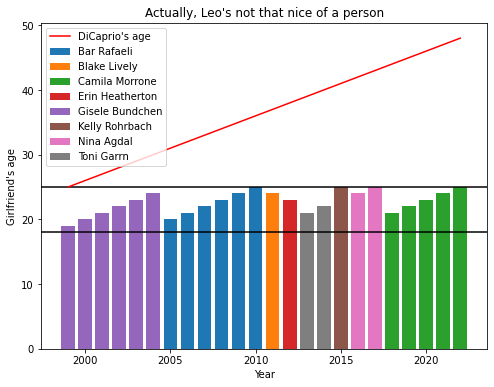

In [162]:
fig, ax = plt.subplots()
for gf, sub_df in data.groupby("girlfriend"):
    ax.bar(x=sub_df["year"], height=sub_df["age"], label=gf)
ax.axhline(25, color="black")
ax.axhline(18, color="black")
ax.plot(data["year"], data["leos_age"], color="red", label="DiCaprio's age")

ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Girlfriend's age")
ax.set_title("Actually, Leo's not that nice of a person")
# ax.set_ylim((0, 30))

fig.set_size_inches(8, 6)

fig.savefig("leonardo.png", dpi=300, facecolor="white")

## Pandas

In [163]:
iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

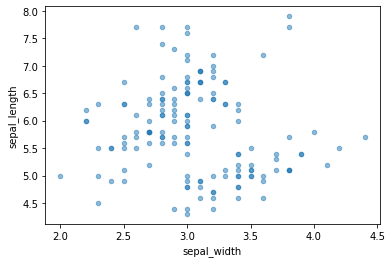

In [166]:
iris.plot.scatter("sepal_width", "sepal_length", alpha=0.5)

Text(0.5, 1.0, 'Plants')

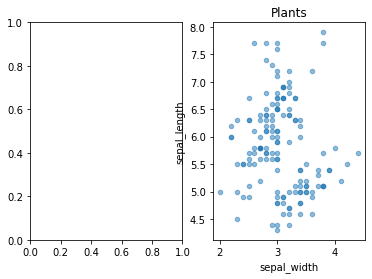

In [173]:
import matplotlib.pyplot as plt
fig_1, ax_1 = plt.subplots(1, 2)
iris.plot.scatter("sepal_width", "sepal_length", alpha=0.5, ax=ax_1[1])
ax_1[1].set_title("Plants")

<AxesSubplot:ylabel='Frequency'>

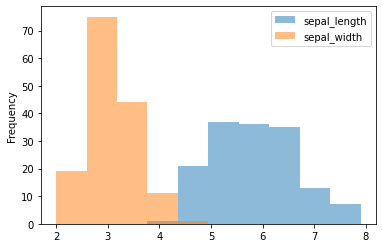

In [177]:
iris[["sepal_length", "sepal_width"]].plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

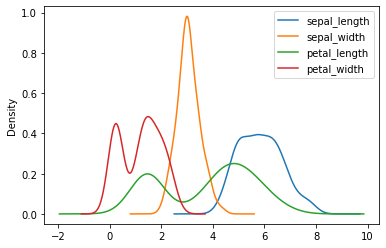

In [178]:
iris.plot.kde()